In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_FOLDER	 ENCODING_TYPE	 SAVES_FOLDER	 attempt_to_pickle	 example_iterrows	 get_column_descriptions	 load_csv	 load_dataframes	 load_object	 
math	 os	 pd	 pickle	 save_dataframes	 store_objects	 



A good way to convert tables of data off of Wikipedia is to use the pandas read_html function:

In [1]:

tables_url = r'https://en.wikipedia.org/wiki/List_of_countries_ranked_by_ethnic_and_cultural_diversity_level'
diversity_level_df_list = pd.read_html(tables_url)
print(len(diversity_level_df_list))

5



Then you have to pick through each dataframe in the list to find the table you want:

In [6]:

diversity_level_df_list[2].head(5)

,0,1,2,3
0,Rank,Country,Ethnic Fractionalization Index,Cultural Diversity Index
1,1,Papua New Guinea,1.000000,—
2,2,Tanzania,0.953000,0.564000
3,3,Democratic Republic of Congo,0.933000,0.628000
4,4,Uganda,0.930000,0.647000



The method I used was to go to https://en.wikipedia.org/wiki/List_of_countries_ranked_by_ethnic_and_cultural_diversity_level and right-click on the table I cared about, select "Inspect", then work my way up the html tags in the inspector pane, right-click on the <table> tag, and choose "Copy outerHTML", paste that in a text editor between "<html><body>" and "</body></html>", save that as "Ethnic_and_Cultural_diversity.html", and put that path in my file_name variable.

In [2]:

file_name = r'../data/html/Ethnic_and_Cultural_diversity.html'
fearon_df = pd.read_html(file_name)[0]
fearon_df.columns = ['Ethnic_diversity_rank', 'Country', 'Ethnic_fractionalization_index',
                     'Cultural_diversity_index']
fearon_df.sample(10).T

,19,137,47,10,96,85,104,156,54,108
Ethnic_diversity_rank,20,138,48,11,97,86,105,157,55,109
Country,Central African Republic,China,Ecuador,Gabon,Singapore,Georgia,Lithuania,Japan,Benin,United Kingdom
Ethnic_fractionalization_index,0.791,0.154,0.655,0.857,0.388,0.49,0.338,0.012,0.622,0.324
Cultural_diversity_index,0.511,0.154,0.48,0.382,0.388,0.404,0.259,0.012,0.4,0.184


In [3]:

file_name = r'../data/html/Ethnic_Linguistic_and_Religious_Fractionalization.html'
alesina_df = pd.read_html(file_name)[0]
alesina_df.columns = ['Fractionalization_rank', 'Country', 'Ethnic_fractionalization',
                      'Linguistic_fractionalization', 'Religious_fractionalization']
alesina_df.sample(10).T

,209,125,17,67,152,168,69,162,53,146
Fractionalization_rank,210,126,18,68,153,169,70,163,54,147
Country,United States Virgin Islands,Mauritius,Belarus,Gabon,Paraguay,Saudi Arabia,Gaza Strip,Rwanda,East Timor,Norway
Ethnic_fractionalization,0,0.4634,0.3222,0.769,0.1689,0.18,0,0.3238,0,0.0586
Linguistic_fractionalization,0.314,0.4547,0.4666,0.7821,0.5975,0.0949,0.0104,0,0.5261,0.0673
Religious_fractionalization,0.6359,0.6385,0.6116,0.6674,0.2123,0.127,0.0342,0.5066,0.4254,0.2048


In [4]:

file_name = r'../data/html/UNODC_murder_rates.html'
unodc_df = pd.read_html(file_name)[0]
unodc_df.columns = ['Country', 'Murder_rate', 'Murder_count', 'Region', 'Subregion', 'Year_listed',
                    'UNODC_notes']
unodc_df.sample(10).T

,46,8,159,18,6,185,212,2,43,82
Country,Guinea,Mauritius,Hungary,Zambia,Madagascar,Portugal,Palau,Djibouti,Ivory Coast,Guatemala
Murder_rate,8.46,2.71,1.48,5.85,0.62,0.97,3.11,6.77,11.84,31.21
Murder_count,1067,34,146,814,130,100,1,60,2688,4998
Region,Africa,Africa,Europe,Africa,Africa,Europe,Oceania,Africa,Africa,Americas
Subregion,Western Africa,Eastern Africa,Eastern Europe,Eastern Africa,Eastern Africa,Southern Europe,Micronesia,Eastern Africa,Western Africa,Central America
Year_listed,2015,2011,2014,2010,2010,2015,2012,2015,2015,2014
UNODC_notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

file_name = r'../data/html/List_of_countries_by_estimated_number_of_guns_per_capita.html'
karp_df = pd.read_html(file_name)[0]
karp_df.columns = ['Gun_rank', 'Country', 'Guns_per_100_residents', 'Karp_notes']
karp_df.sample(10).T

,172,19,123,27,50,39,105,8,59,97
Gun_rank,172,48,123,28,51,40,105,9,60,97
Country,Ghana,Australia,Mongolia,Lebanon,Turkey,Luxembourg,Cambodia,France,Argentina,Morocco
Guns_per_100_residents,0.4,13.1,1.9,21,12.5,15.3,4.3,31.2,10.2,5
Karp_notes,NaN,The state of Tasmania has the highest gun owne...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

sorted(list(set(fearon_df['Country']) ^ set(alesina_df['Country'])))

['American Samoa', 'Andorra', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Brunei', 'Cape Verde', 'Comoros', 'Czechoslovakia (1918â\x80\x931992)', 'Dominica', 'East Timor', 'Equatorial Guinea', 'Faroe Islands', 'French Guiana', 'French Polynesia', 'Gambia', 'Gambia, The', 'Gaza Strip', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Hong Kong', 'Iceland', 'Isle of Man', 'Jersey', 'Kingdom of Yugoslavia (1918â\x80\x931943)', 'Kiribati', 'Korea, North', 'Korea, South', 'Liechtenstein', 'Luxembourg', 'Macau', 'Malta', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia', 'Monaco', 'Nauru', 'Netherlands Antilles', 'New Caledonia', 'North Korea', 'Northern Mariana Islands', 'Palau', 'Puerto Rico', 'Qatar', 'Reunion', 'Russia', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovakia', 'Solomon Islands', 'South Korea', 'Sovie

In [7]:

sorted(list(set(fearon_df['Country']) ^ set(unodc_df['Country'])))

['Andorra', 'Anguilla (UK)', 'Antigua and Barbuda', 'Aruba (Netherlands)', 'Bahamas', 'Barbados', 'Belize', 'Bermuda (UK)', 'British Virgin Islands (UK)', 'Brunei', 'Burma', 'Cape Verde', 'Cayman Islands (UK)', 'Comoros', 'Congo', 'Cook Islands', 'Czechoslovakia (1918â\x80\x931992)', 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Dominica', 'East Timor', 'Equatorial Guinea', 'French Guiana (France)', 'French Polynesia (France)', 'Greenland (Denmark)', 'Grenada', 'Guadeloupe (France)', 'Guam (US)', 'Hong Kong', 'Iceland', 'Kingdom of Yugoslavia (1918â\x80\x931943)', 'Kiribati', 'Kosovo', 'Liechtenstein', 'Luxembourg', 'Macao', 'Maldives', 'Malta', 'Marshall Islands', 'Martinique (France)', 'Mayotte (France)', 'Micronesia, Fed. Sts.', 'Monaco', 'Montenegro', 'Montserrat (UK)', 'Myanmar', 'Nauru', 'New Caledonia (France)', 'Niue', 'Palau', 'Palestine', 'Puerto Rico (US)', 'Qatar', 'Republic of the Congo', 'RÃ©union (France)', 'Saint Kitts and Nevis', 'Saint Lucia', '

In [8]:

sorted(list(set(fearon_df['Country']) ^ set(karp_df['Country'])))

['Bahamas', 'Barbados', 'Belize', 'Brunei', 'Burma', 'Cape Verde', 'Comoros', 'Czechoslovakia (1918â\x80\x931992)', "CÃ´te d'Ivoire", 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Equatorial Guinea', 'Iceland', 'Ivory Coast', 'Kingdom of Yugoslavia (1918â\x80\x931943)', 'Luxembourg', 'Macedonia', 'Maldives', 'Malta', 'Montenegro', 'Myanmar', 'Palestine', 'Qatar', 'Republic of China (Taiwan)', 'Republic of Macedonia', 'Serbia', 'Seychelles', 'Solomon Islands', 'Soviet Union (1922â\x80\x931991)', 'Sudan (1955â\x80\x932011)', 'Sudan South Sudan', 'Suriname', 'Taiwan', 'Timor-Leste', 'Transnistria', 'World', 'Yugoslavia (1943â\x80\x931992)']

In [9]:

sorted(list(set(alesina_df['Country']) ^ set(unodc_df['Country'])))

['American Samoa', 'Anguilla (UK)', 'Aruba', 'Aruba (Netherlands)', 'Bermuda', 'Bermuda (UK)', 'British Virgin Islands (UK)', 'Burma', 'Cayman Islands (UK)', 'Congo', 'Cook Islands', 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Faroe Islands', 'French Guiana', 'French Guiana (France)', 'French Polynesia', 'French Polynesia (France)', 'Gambia', 'Gambia, The', 'Gaza Strip', 'Greenland', 'Greenland (Denmark)', 'Guadeloupe', 'Guadeloupe (France)', 'Guam', 'Guam (US)', 'Isle of Man', 'Jersey', 'Korea, North', 'Korea, South', 'Kosovo', 'Macao', 'Macau', 'Maldives', 'Martinique', 'Martinique (France)', 'Mayotte', 'Mayotte (France)', 'Micronesia', 'Micronesia, Fed. Sts.', 'Montenegro', 'Montserrat (UK)', 'Myanmar', 'Netherlands Antilles', 'New Caledonia', 'New Caledonia (France)', 'Niue', 'North Korea', 'Northern Mariana Islands', 'Palestine', 'Puerto Rico', 'Puerto Rico (US)', 'Republic of the Congo', 'Reunion', 'Russia', 'Russian Federation', 'RÃ©union (France)', 'Sai

In [10]:

sorted(list(set(alesina_df['Country']) ^ set(karp_df['Country'])))

['American Samoa', 'Andorra', 'Antigua and Barbuda', 'Aruba', 'Bermuda', 'Burma', "CÃ´te d'Ivoire", 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Dominica', 'East Timor', 'Faroe Islands', 'French Guiana', 'French Polynesia', 'Gambia', 'Gambia, The', 'Gaza Strip', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Hong Kong', 'Isle of Man', 'Ivory Coast', 'Jersey', 'Kiribati', 'Korea, North', 'Korea, South', 'Liechtenstein', 'Macau', 'Macedonia', 'Maldives', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia', 'Monaco', 'Montenegro', 'Myanmar', 'Nauru', 'Netherlands Antilles', 'New Caledonia', 'North Korea', 'Northern Mariana Islands', 'Palau', 'Palestine', 'Puerto Rico', 'Republic of China (Taiwan)', 'Republic of Macedonia', 'Reunion', 'Russia', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Slovak Republic', 'Slovakia', 'South Korea', 'Sudan', 'Sudan South Sudan', 'Taiwa

In [11]:

sorted(list(set(unodc_df['Country']) ^ set(karp_df['Country'])))

['Andorra', 'Anguilla (UK)', 'Antigua and Barbuda', 'Aruba (Netherlands)', 'Bermuda (UK)', 'British Virgin Islands (UK)', 'Cayman Islands (UK)', 'Congo', 'Cook Islands', "CÃ´te d'Ivoire", 'Dominica', 'East Timor', 'French Guiana (France)', 'French Polynesia (France)', 'Greenland (Denmark)', 'Grenada', 'Guadeloupe (France)', 'Guam (US)', 'Hong Kong', 'Ivory Coast', 'Kiribati', 'Kosovo', 'Liechtenstein', 'Macao', 'Macedonia', 'Marshall Islands', 'Martinique (France)', 'Mayotte (France)', 'Micronesia, Fed. Sts.', 'Monaco', 'Montserrat (UK)', 'Nauru', 'New Caledonia (France)', 'Niue', 'Palau', 'Puerto Rico (US)', 'Republic of China (Taiwan)', 'Republic of Macedonia', 'Republic of the Congo', 'RÃ©union (France)', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Pierre and Miquelon (France)', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'South Sudan', 'Sudan', 'Sudan South Sudan', 'Taiwan', 'Timor-Leste', 'Tonga', 'Transnistria', 'Turks and Caicos Islands

In [12]:

country_list = sorted(list(set(fearon_df['Country']) & set(alesina_df['Country']) &
                           set(unodc_df['Country']) & set(karp_df['Country'])))
country_list

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', '

In [13]:

merge_df = pd.merge(left=fearon_df, right=alesina_df, how='inner', on=['Country'],
                    suffixes=('_fearon', '_alesina'))
merge_df.sample(10).T

,43,136,62,58,99,2,118,119,126,6
Ethnic_diversity_rank,48,145,68,63,108,3,127,128,135,7
Country,Ecuador,Austria,Bahrain,Switzerland,Burundi,Democratic Republic of Congo,El Salvador,Sweden,Jamaica,Togo
Ethnic_fractionalization_index,0.655,0.126,0.551,0.575,0.328,0.933,0.198,0.189,0.166,0.883
Cultural_diversity_index,0.48,0.1,0.46,0.418,0.04,0.628,0.18,0.189,0.027,0.602
Fractionalization_rank,55,12,15,187,31,42,57,186,96,193
Ethnic_fractionalization,0.655,0.1068,0.5021,0.5314,0.2951,0.8747,0.1978,0.06,0.4129,0.7099
Linguistic_fractionalization,0.1308,0.1522,0.4344,0.5441,0.2977,0.8705,0,0.1968,0.1098,0.898
Religious_fractionalization,0.1417,0.4146,0.5528,0.6083,0.5158,0.7021,0.3559,0.2342,0.616,0.6596


In [14]:

merge_df = pd.merge(left=merge_df, right=unodc_df, how='inner', on=['Country'],
                    suffixes=('_merge', '_unodc'))
merge_df.sample(10).T

,98,28,27,100,30,5,75,142,49,117
Ethnic_diversity_rank,110,33,32,112,35,7,85,154,56,129
Country,Czech Republic,United Arab Emirates,Bolivia,Romania,Zambia,Togo,United States,Portugal,Guyana,Azerbaijan
Ethnic_fractionalization_index,0.322,0.737,0.743,0.3,0.726,0.883,0.491,0.04,0.62,0.188
Cultural_diversity_index,0.064,0.65,0.662,0.265,0.189,0.602,0.271,0.04,0.46,0.187
Fractionalization_rank,49,202,24,161,214,193,204,157,82,13
Ethnic_fractionalization,0.3222,0.6252,0.7396,0.3069,0.7808,0.7099,0.4901,0.0468,0.6195,0.2047
Linguistic_fractionalization,0.3233,0.4874,0.224,0.1723,0.8734,0.898,0.5647,0.0198,0.0688,0.2054
Religious_fractionalization,0.6591,0.331,0.2085,0.2373,0.7359,0.6596,0.8241,0.1438,0.7876,0.4899
Murder_rate,0.75,0.66,12.4,1.49,5.85,9.14,4.88,0.97,19.42,2.45
Murder_count,79,60,1270,291,814,668,15696,100,149,236


In [15]:

merge_df = pd.merge(left=merge_df, right=karp_df, how='inner', on=['Country'],
                    suffixes=('_merge', '_karp'))
merge_df.sample(10).T

,136,21,45,72,120,68,77,76,109,18
Ethnic_diversity_rank,151,27,53,84,135,79,89,88,124,23
Country,Netherlands,Sierra Leone,Mauritius,Guatemala,Jamaica,Jordan,Laos,Venezuela,Bangladesh,Chad
Ethnic_fractionalization_index,0.077,0.764,0.632,0.493,0.166,0.509,0.481,0.483,0.223,0.772
Cultural_diversity_index,0.077,0.534,0.448,0.493,0.027,0.049,0.02,0.02,0.141,0.727
Fractionalization_rank,140,173,126,79,96,99,107,208,16,37
Ethnic_fractionalization,0.1054,0.8191,0.4634,0.5122,0.4129,0.5926,0.5139,0.4966,0.0454,0.862
Linguistic_fractionalization,0.5143,0.7634,0.4547,0.4586,0.1098,0.0396,0.6382,0.0686,0.0925,0.8635
Religious_fractionalization,0.7222,0.5395,0.6385,0.3753,0.616,0.0659,0.5453,0.135,0.209,0.6411
Murder_rate,0.61,1.92,2.71,31.21,43.21,2,6.87,57.15,2.51,9.02
Murder_count,104,124,34,4998,1207,144,467,17778,4035,1266


In [16]:

merge_df['Murder_count'] = merge_df['Murder_count'].map(lambda x: int(x))

In [17]:

merge_df['Gun_rank'] = merge_df['Gun_rank'].map(lambda x: int(x))

In [18]:

merge_df['Region_code'] = pd.Categorical(merge_df['Region']).codes

In [19]:

merge_df['Subregion_code'] = pd.Categorical(merge_df['Subregion']).codes

In [20]:

merge_df = merge_df.sort_values('Linguistic_fractionalization')
merge_df['Cultural_diversity_index'] = merge_df['Cultural_diversity_index'].interpolate()

In [21]:

merge_df = merge_df.set_index(['Country'])

In [22]:

def check_4_correlation(df, column_list=None):
    if column_list is None:
        column_list = df.columns
    rows_list = []
    n = len(column_list)
    for i in range(n-1):
        first_column = column_list[i]
        max_correlation = 0.0
        max_column = first_column
        for j in range(i+1, n):
            second_column = column_list[j]

            # Assume the first column is never identical to the second column
            this_correlation = df[first_column].corr(df[second_column])
            
            if this_correlation > max_correlation:
                max_correlation = this_correlation
                max_column = second_column

        # Get input row in dictionary format; key = col_name
        if first_column != max_column:
            row_dict = {}
            row_dict['first_column'] = first_column
            row_dict['second_column'] = max_column
            row_dict['max_correlation'] = max_correlation

            rows_list.append(row_dict)

    column_list = ['first_column', 'second_column', 'max_correlation']
    column_correlations_df = pd.DataFrame(rows_list, columns=column_list)

    return column_correlations_df

In [23]:

dtype_df = get_column_descriptions(merge_df)
dtype_df

,column_name,dtype,count_blanks,count_uniques,count_zeroes,has_dates,only_integers
0,Region_code,int8,0,5,43,True,True
1,Subregion_code,int8,0,20,2,True,True
2,Ethnic_diversity_rank,int64,0,143,0,True,True
3,Fractionalization_rank,int64,0,143,0,True,True
4,Murder_count,int64,0,135,0,True,True
5,Year_listed,int64,0,6,0,True,True
6,Gun_rank,int64,0,142,0,True,True
7,Ethnic_fractionalization_index,float64,0,132,0,True,False
8,Cultural_diversity_index,float64,0,120,6,True,False
9,Ethnic_fractionalization,float64,0,141,1,True,False


In [24]:

match_series = (dtype_df['only_integers'].isnull())
numeric_columns = dtype_df[~match_series]['column_name'].tolist()
column_correlations_df = check_4_correlation(merge_df, column_list=numeric_columns)
column_correlations_df.sort_values('max_correlation', ascending=False)

,first_column,second_column,max_correlation
7,Ethnic_fractionalization_index,Ethnic_fractionalization,0.830909
8,Cultural_diversity_index,Linguistic_fractionalization,0.692981
9,Ethnic_fractionalization,Linguistic_fractionalization,0.679794
0,Region_code,Ethnic_diversity_rank,0.466551
10,Linguistic_fractionalization,Religious_fractionalization,0.329715
4,Murder_count,Murder_rate,0.295284
6,Gun_rank,Linguistic_fractionalization,0.266125
1,Subregion_code,Guns_per_100_residents,0.230024
2,Ethnic_diversity_rank,Guns_per_100_residents,0.198176
5,Year_listed,Guns_per_100_residents,0.152292


C:\Users\dev\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


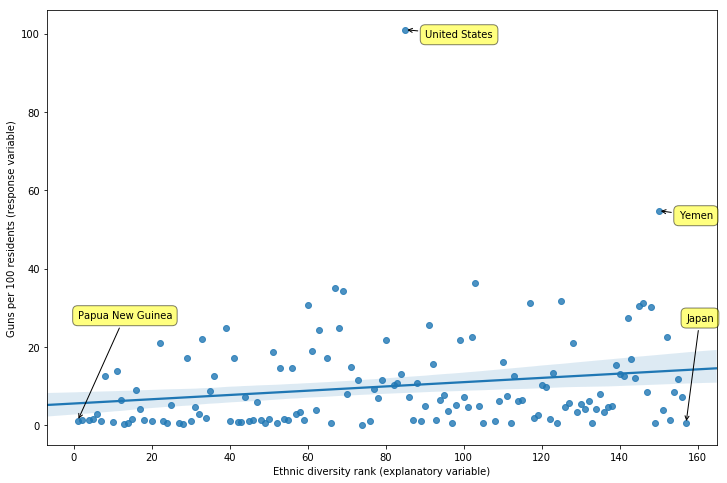

In [25]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
scatter_kws = dict(facecolors=merge_df['Subregion_code'])
merge_axes_subplot = sns.regplot(x='Ethnic_diversity_rank', y='Guns_per_100_residents',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Ethnic diversity rank (explanatory variable)')
ylabel_text = plt.ylabel('Guns per 100 residents (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
diversest_ethnicity = merge_df['Ethnic_diversity_rank'].min()
purest_ethnicity = merge_df['Ethnic_diversity_rank'].max()
for label, x, y in zip(merge_df.index, merge_df['Ethnic_diversity_rank'],
                       merge_df['Guns_per_100_residents']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x == diversest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)
    if (x == purest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)

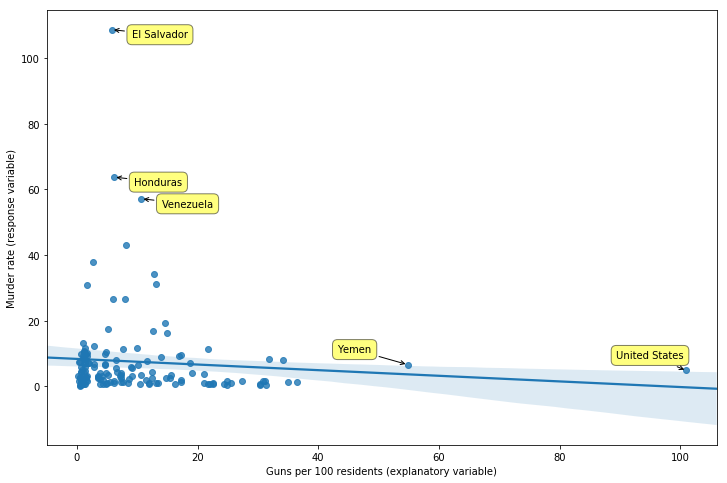

In [26]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Guns_per_100_residents', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Guns per 100 residents (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
for label, x, y in zip(merge_df.index, merge_df['Guns_per_100_residents'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-70, 10), **kwargs)

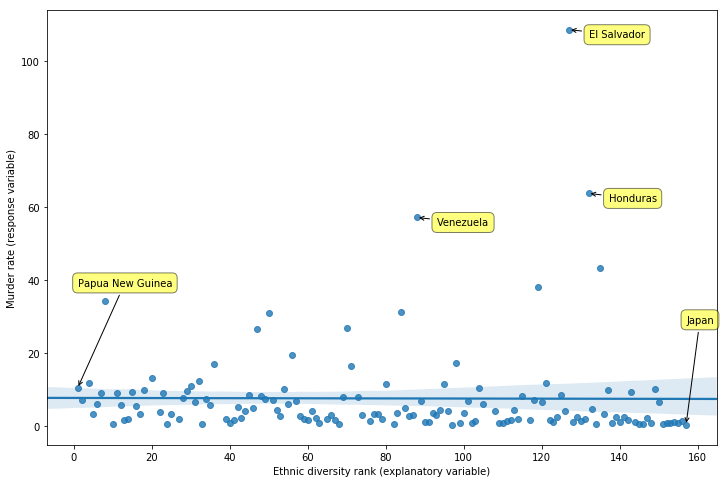

In [27]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Ethnic_diversity_rank', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Ethnic diversity rank (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
diversest_ethnicity = merge_df['Ethnic_diversity_rank'].min()
purest_ethnicity = merge_df['Ethnic_diversity_rank'].max()
for label, x, y in zip(merge_df.index, merge_df['Ethnic_diversity_rank'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x == diversest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)
    if (x == purest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)

In [28]:

numeric_columns.remove('Year_listed')
numeric_columns.remove('Gun_rank')
numeric_columns.remove('Region_code')
numeric_columns.remove('Subregion_code')
numeric_columns.remove('Murder_count')
numeric_columns.remove('Ethnic_diversity_rank')
numeric_columns.remove('Fractionalization_rank')
numeric_columns.remove('Ethnic_fractionalization')
print(numeric_columns)

['Ethnic_fractionalization_index', 'Cultural_diversity_index', 'Linguistic_fractionalization', 'Religious_fractionalization', 'Murder_rate', 'Guns_per_100_residents']


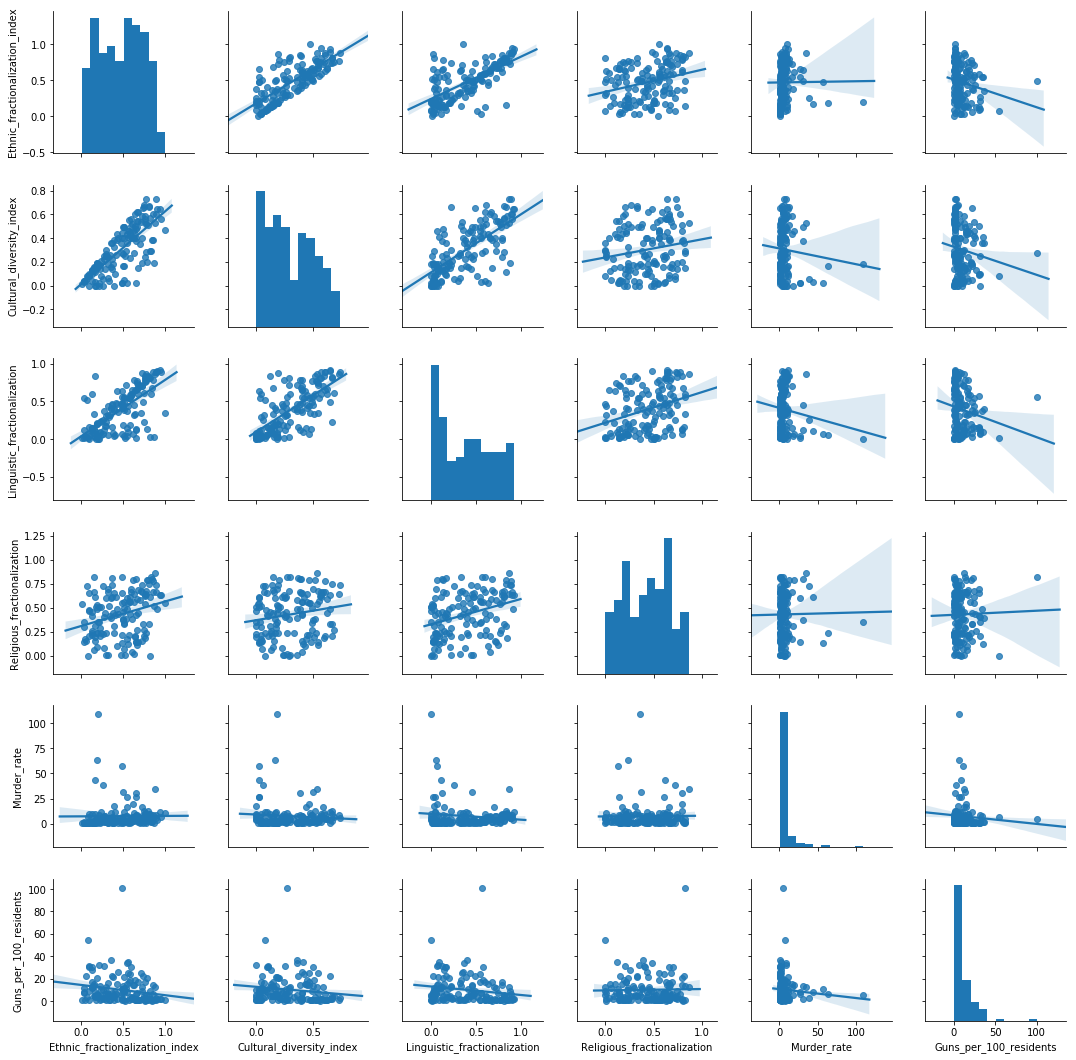

In [29]:

merge_pair_grid = sns.pairplot(merge_df[numeric_columns], kind='reg')

In [30]:

column_correlations_df = check_4_correlation(merge_df[numeric_columns], column_list=numeric_columns)
column_correlations_df.sort_values('max_correlation', ascending=False)

,first_column,second_column,max_correlation
0,Ethnic_fractionalization_index,Cultural_diversity_index,0.768347
1,Cultural_diversity_index,Linguistic_fractionalization,0.692981
2,Linguistic_fractionalization,Religious_fractionalization,0.329715
3,Religious_fractionalization,Guns_per_100_residents,0.022810


In [31]:

least_murderous = merge_df['Murder_rate'].min()

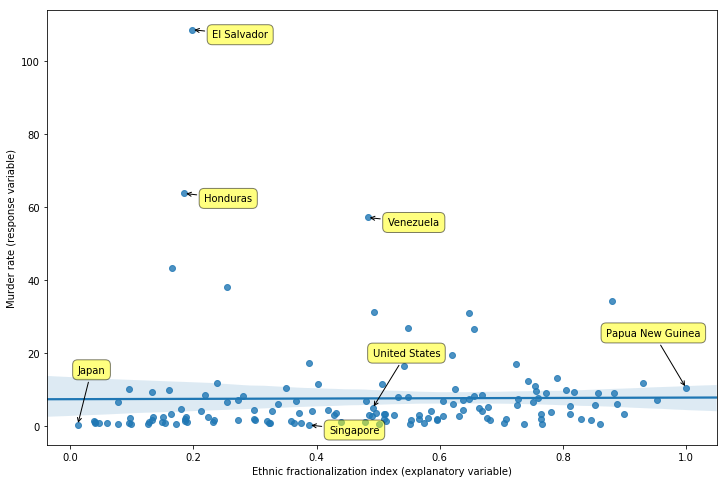

In [32]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Ethnic_fractionalization_index', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Ethnic fractionalization index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_fractional = merge_df['Ethnic_fractionalization_index'].min()
most_fractional = merge_df['Ethnic_fractionalization_index'].max()
for label, x, y in zip(merge_df.index, merge_df['Ethnic_fractionalization_index'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)
    elif (x == most_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)

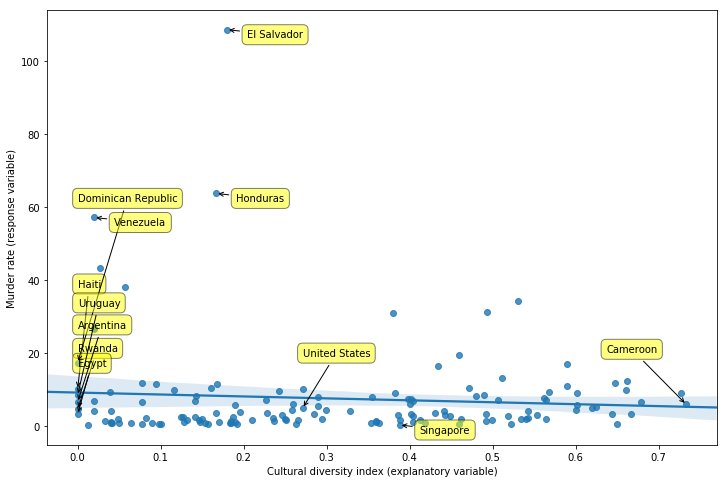

In [33]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Cultural_diversity_index', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Cultural diversity index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_diverse = merge_df['Cultural_diversity_index'].min()
most_diverse = merge_df['Cultural_diversity_index'].max()
for label, x, y in zip(merge_df.index, merge_df['Cultural_diversity_index'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_diverse):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 20+y*8), **kwargs)
    elif (x == most_diverse):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)

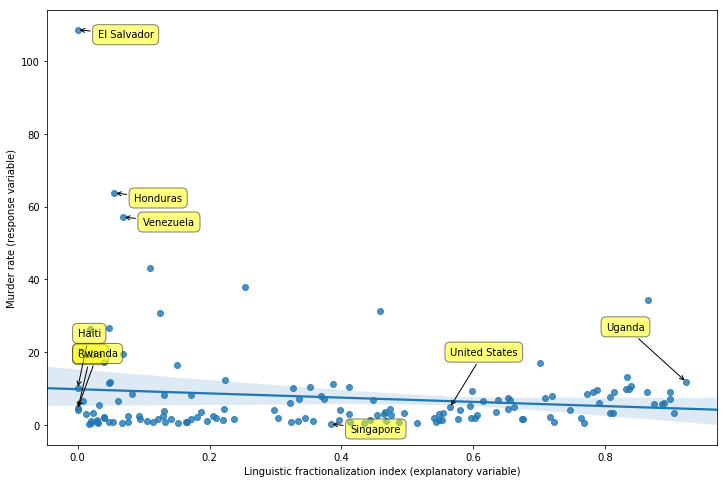

In [34]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Linguistic_fractionalization', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Linguistic fractionalization index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_fractional = merge_df['Linguistic_fractionalization'].min()
most_fractional = merge_df['Linguistic_fractionalization'].max()
for label, x, y in zip(merge_df.index, merge_df['Linguistic_fractionalization'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)
    elif (x == most_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)

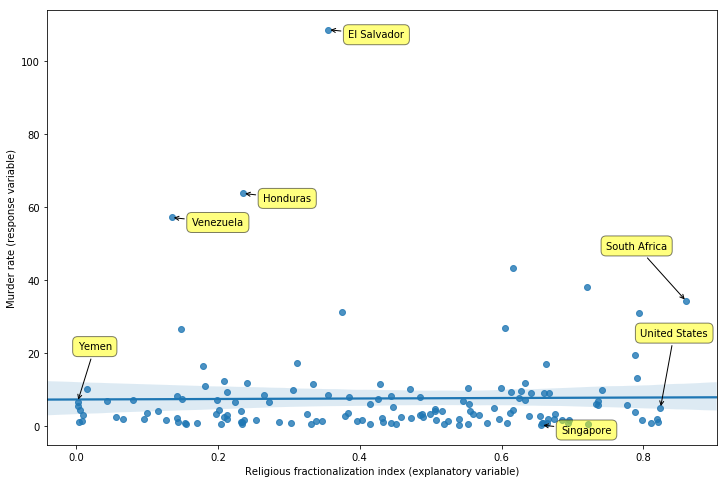

In [35]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Religious_fractionalization', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Religious fractionalization index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_fractional = merge_df['Religious_fractionalization'].min()
most_fractional = merge_df['Religious_fractionalization'].max()
for label, x, y in zip(merge_df.index, merge_df['Religious_fractionalization'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)
    elif (x == most_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-20, 70), **kwargs)

In [36]:

file_name = r'../data/html/average-iq-by-country.html'
iq_df = pd.read_html(file_name)[0]
iq_df.columns = ['IQ_Rank', 'Country', 'IQ']
iq_df.sample(10).T

,107,119,155,134,8,122,11,108,128,173
IQ_Rank,23,25,36,28,6,25,7,23,26,39
Country,Solomon Islands,Bangladesh,Botswana,Sri Lanka,Mongolia,Lebanon,Luxembourg,Uganda,Nicaragua,Lesotho
IQ,84,82,70,79,101,82,100,84,81,67


In [37]:

merge_df.reset_index(level=0, inplace=True)
merge_df = pd.merge(left=merge_df, right=iq_df, how='inner', on=['Country'],
                    suffixes=('_merge', '_iq'))
merge_df.sample(10).T

,76,44,83,50,16,111,56,36,92,112
Country,Bahrain,Germany,Morocco,Azerbaijan,Jordan,Bosnia and Herzegovina,Lesotho,Trinidad and Tobago,Fiji,Namibia
Ethnic_diversity_rank,68,148,90,129,79,41,119,50,66,36
Ethnic_fractionalization_index,0.551,0.095,0.479,0.188,0.509,0.681,0.255,0.647,0.566,0.724
Cultural_diversity_index,0.46,0.09,0.36,0.187,0.049,0.146,0.057,0.38,0.553,0.589
Fractionalization_rank,15,72,133,13,99,25,110,195,63,136
Ethnic_fractionalization,0.5021,0.1682,0.4841,0.2047,0.5926,0.63,0.255,0.6475,0.5479,0.6329
Linguistic_fractionalization,0.4344,0.1642,0.4683,0.2054,0.0396,0.6751,0.2543,0.1251,0.5479,0.7005
Religious_fractionalization,0.5528,0.6571,0.0035,0.4899,0.0659,0.6851,0.7211,0.7936,0.5682,0.6626
Murder_rate,0.54,0.85,1.05,2.45,2,1.5,38,30.88,2.97,16.93
Murder_count,7,682,355,236,144,57,764,420,26,388


In [38]:

merge_df = merge_df.set_index(['Country'])

In [39]:

store_objects(gun_stats_df=merge_df)

Pickling to ../saves/pickle/gun_stats_df.pickle


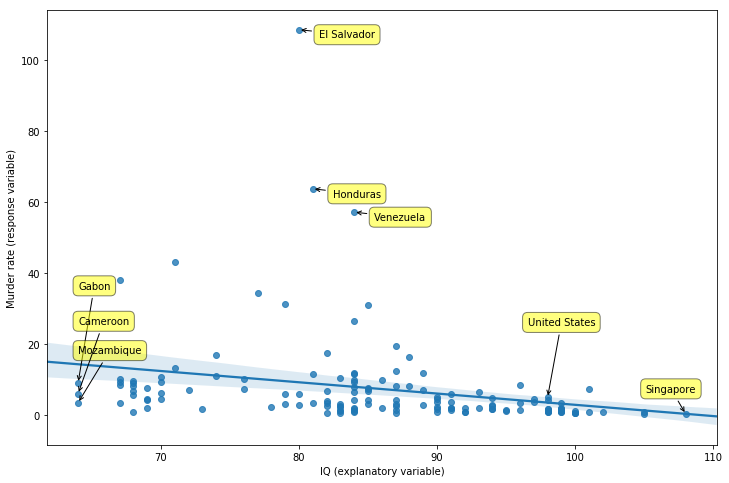

In [40]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='IQ', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('IQ (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
dumbest = merge_df['IQ'].min()
smartest = merge_df['IQ'].max()
for label, x, y in zip(merge_df.index, merge_df['IQ'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-40, 20), **kwargs)
    elif (x == dumbest):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 20+y*8), **kwargs)
    elif (x == smartest):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-20, 70), **kwargs)

In [41]:

match_series = (merge_df.index == 'United States')
merge_df[match_series].T

Country,United States
Ethnic_diversity_rank,85
Ethnic_fractionalization_index,0.491
Cultural_diversity_index,0.271
Fractionalization_rank,204
Ethnic_fractionalization,0.4901
Linguistic_fractionalization,0.5647
Religious_fractionalization,0.8241
Murder_rate,4.88
Murder_count,15696
Region,Americas


In [58]:

match_series = (merge_df.index == 'Mexico')
merge_df[match_series].T

Country,Mexico
Ethnic_diversity_rank,71
Ethnic_fractionalization_index,0.542
Cultural_diversity_index,0.434
Fractionalization_rank,128
Ethnic_fractionalization,0.5418
Linguistic_fractionalization,0.1511
Religious_fractionalization,0.1796
Murder_rate,16.35
Murder_count,20762
Region,Americas


In [42]:

def cn2str(column_name):
    
    return ' '.join(column_name.split('_')).lower()

country_str = 'United States'

guns_column_name = 'Guns_per_100_residents'
guns_mean = merge_df[guns_column_name].mean()
guns_std = merge_df[guns_column_name].std()
guns_us_diff = merge_df.loc[country_str, guns_column_name] - guns_mean
guns_us_ratio = guns_us_diff / guns_std
if guns_us_ratio > 0:
    guns_above_below = 'above'
else:
    guns_us_ratio = -guns_us_ratio
    guns_above_below = 'below'

murder_column_name = 'Murder_rate'
murder_mean = merge_df[murder_column_name].mean()
murder_std = merge_df[murder_column_name].std()
murder_us_diff = merge_df.loc[country_str, murder_column_name] - murder_mean
murder_us_ratio = murder_us_diff / murder_std
if murder_us_ratio > 0:
    murder_above_below = 'above'
else:
    murder_us_ratio = -murder_us_ratio
    murder_above_below = 'below'

format_str = 'The {} has a {} {:0.1f} standard deviations {} the mean, '
format_str += 'but a {} {:0.1f} standard deviations {} the mean.'
print(format_str.format(country_str, cn2str(guns_column_name), guns_us_ratio, guns_above_below,
                        cn2str(murder_column_name), murder_us_ratio, murder_above_below))

The United States has a guns per 100 residents 7.2 standard deviations above the mean, but a murder rate 0.2 standard deviations below the mean.



Andrew Fenic: If you include Syria and Africa, sure. If you look at the US v our industrialized peers our homicide rates are INSANE. Off the scale higher -- I think our homicide rate is 50 times higher than Japan per capita, and about 5 times higher than even the UK which has a lot of crime.

In [50]:

match_series = (merge_df['Region'] != 'Africa') & (merge_df.index != 'Syria')
df = merge_df[match_series].copy()

guns_mean = df[guns_column_name].mean()
guns_std = df[guns_column_name].std()
guns_us_diff = df.loc[country_str, guns_column_name] - guns_mean
guns_us_ratio = guns_us_diff / guns_std
if guns_us_ratio > 0:
    guns_above_below = 'above'
else:
    guns_us_ratio = -guns_us_ratio
    guns_above_below = 'below'

murder_mean = df[murder_column_name].mean()
murder_std = df[murder_column_name].std()
murder_us_diff = df.loc[country_str, murder_column_name] - murder_mean
murder_us_ratio = murder_us_diff / murder_std
if murder_us_ratio > 0:
    murder_above_below = 'above'
else:
    murder_us_ratio = -murder_us_ratio
    murder_above_below = 'below'

format_str = 'But, taking out Syria and Africa, the {} has a {} {:0.1f} standard deviations '
format_str += '{} the mean, and a {} still {:0.1f} standard deviations {} the mean.'
print(format_str.format(country_str, cn2str(guns_column_name), guns_us_ratio, guns_above_below,
                        cn2str(murder_column_name), murder_us_ratio, murder_above_below))

But, taking out Syria and Africa, the United States has a guns per 100 residents 6.3 standard deviations above the mean, and a murder rate still 0.2 standard deviations below the mean.


In [53]:

us_homicide_rate = merge_df.loc['United States', 'Murder_rate']
jp_homicide_rate = merge_df.loc['Japan', 'Murder_rate']
uk_homicide_rate = merge_df.loc['United Kingdom', 'Murder_rate']
jp_murder_ratio = us_homicide_rate / jp_homicide_rate
uk_murder_ratio = us_homicide_rate / uk_homicide_rate
format_str = 'Our homicide rate is {:0.1f} times higher than Japan per capita and {:0.1f} '
format_str += 'times higher than the United Kingdom.'
print(format_str.format(jp_murder_ratio, uk_murder_ratio))

Our homicide rate is 15.7 times higher than Japan per capita and 5.3 times higher than the United Kingdom.



And an ethnic basis for crime can be proven false by contradiction - Mauritania, for example, has extremely low crime rates despite having a highly diverse population. A reason is that it is much richer with about 20k per capita income, far higher than most nations in Africa. And it has more income equality.

In [57]:

country_str = 'Mauritania'

murder_column_name = 'Murder_rate'
murder_mean = merge_df[murder_column_name].mean()
murder_std = merge_df[murder_column_name].std()
murder_us_diff = merge_df.loc[country_str, murder_column_name] - murder_mean
murder_us_ratio = murder_us_diff / murder_std
if murder_us_ratio > 0:
    murder_above_below = 'above'
else:
    murder_us_ratio = -murder_us_ratio
    murder_above_below = 'below'

ethnic_column_name = 'Ethnic_fractionalization_index'
ethnic_mean = merge_df[ethnic_column_name].mean()
ethnic_std = merge_df[ethnic_column_name].std()
ethnic_us_diff = merge_df.loc[country_str, ethnic_column_name] - ethnic_mean
ethnic_us_ratio = ethnic_us_diff / ethnic_std
if ethnic_us_ratio > 0:
    ethnic_above_below = 'above'
else:
    ethnic_us_ratio = -ethnic_us_ratio
    ethnic_above_below = 'below'

format_str = '{} has a {} {:0.1f} standard deviations {} the mean, '
format_str += 'and a {} {:0.1f} standard deviations {} the mean.'
print(format_str.format(country_str, cn2str(murder_column_name), murder_us_ratio, murder_above_below,
                        cn2str(ethnic_column_name), ethnic_us_ratio, ethnic_above_below))

Mauritania has a murder rate 0.2 standard deviations above the mean, and a ethnic fractionalization index 0.6 standard deviations above the mean.


In [40]:

match_series = (merge_df.index == 'Mauritania')
merge_df[match_series].T

Country,Mauritania
Ethnic_diversity_rank,54
Ethnic_fractionalization_index,0.625
Cultural_diversity_index,0.272
Fractionalization_rank,125
Ethnic_fractionalization,0.615
Linguistic_fractionalization,0.326
Religious_fractionalization,0.0149
Murder_rate,10.22
Murder_count,416
Region,Africa



During 2015–2016, the age-adjusted homicide rate for the total population increased from 5.7 to 6.2 per 100,000 standard population (an 8.8% increase). The rate increased from 2.6 to 2.9 (11.5%) for non-Hispanic whites, from 20.9 to 22.8 (9.1%) for non-Hispanic blacks, and from 4.9 to 5.3 (8.2%) for Hispanics. In both years, the homicide rate for non-Hispanic blacks was approximately eight times the rate for non-Hispanic whites and four times the rate for Hispanics.

In [41]:

file_name = r'https://en.wikipedia.org/wiki/List_of_countries_by_income_equality'
List_of_countries_by_income_equality_df = pd.read_html(file_name)
print(len(List_of_countries_by_income_equality_df))

10


In [42]:

import re

one_regex = re.compile(r'[\[ \/–]+')
gini_df = List_of_countries_by_income_equality_df[2]
gini_df.columns = ['Country', '10_prc_UN_R_by_P', '20_prc_UN_R_by_P', 'prc_World_Bank_Gini',
                   'Year_World_Bank_Gini', '10_prc_CIA_R_by_P', 'Year_CIA_R_by_P', 'prc_CIA_Gini',
                   'Year_CIA_Gini']
gini_df = gini_df.iloc[3:180]
gini_df = gini_df.set_index(['Country'])
for column_name in ['10_prc_UN_R_by_P']:
    gini_df[column_name] = gini_df[column_name].map(lambda x: float(x))
for column_name in ['prc_CIA_Gini',
                    '10_prc_CIA_R_by_P', 'prc_World_Bank_Gini', '20_prc_UN_R_by_P']:
    gini_df[column_name] = gini_df[column_name].map(lambda x: float(str(x).split('[')[0]))
for column_name in ['Year_CIA_R_by_P', 'Year_World_Bank_Gini', 'Year_CIA_Gini']:
    gini_df[column_name] = gini_df[column_name].map(lambda x: float(one_regex.split(str(x))[0]))
gini_df.sample(10).T.sample(5).T

,Year_World_Bank_Gini,10_prc_CIA_R_by_P,prc_CIA_Gini,20_prc_UN_R_by_P,Year_CIA_R_by_P
Country,,,,,
Burkina Faso,2014.0,11.5,39.5,6.9,2003.0
Zimbabwe,2011.0,NaN,50.1,NaN,NaN
Pakistan,2013.0,6.6,29.6,4.3,2002.0
Moldova,2015.0,8.3,33.0,5.3,2003.0
Libya,NaN,NaN,NaN,NaN,NaN
Cape Verde,2007.0,NaN,NaN,NaN,NaN
Kosovo,2013.0,NaN,NaN,NaN,NaN
Sweden,2014.0,6.2,24.9,4.0,2000.0
Japan,2008.0,4.5,37.9,3.4,1993.0


In [43]:

# The countries in the Gini dataframe that are not in the merge dataframe
sorted(list(set(merge_df.index) ^ set(gini_df.index)))

['Belize', 'Brazil', 'Cape Verde', 'Comoros', 'Congo, Republic of the', "Côte d'Ivoire", 'DR Congo', 'Equatorial Guinea', 'Eritrea', 'European Union', 'Hong Kong', 'Iceland', 'Kosovo', 'Luxembourg', 'Macau', 'Macedonia', 'Maldives', 'Malta', 'Micronesia', 'Montenegro', 'Myanmar', 'New Zealand', 'North Korea', 'Palestine', 'Qatar', 'Russia', 'Sao Tome and Principe', 'Serbia', 'Seychelles', 'Slovakia', 'South Korea', 'South Sudan', 'St. Lucia', 'Sudan', 'Suriname', 'Taiwan', 'The Gambia', 'Timor-Leste']

In [45]:

gun_stats_df = load_object('gun_stats_df')

In [46]:

merge_df = pd.merge(left=gun_stats_df, right=gini_df, how='inner', suffixes=('_gun_stats', '_gini'),
                    left_index=True, right_index=True)

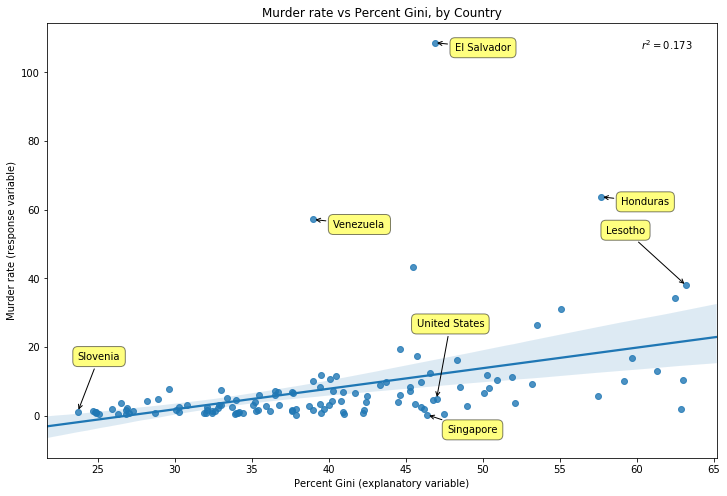

In [61]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
df = merge_df.dropna(subset=['prc_CIA_Gini', 'Murder_rate']).copy()
merge_axes_subplot = sns.regplot(x='prc_CIA_Gini', y='Murder_rate',
                                 scatter=True, data=df)
xlabel_str = 'Percent Gini'
xlabel_text = plt.xlabel('{} (explanatory variable)'.format(xlabel_str))
ylabel_str = 'Murder rate'
ylabel_text = plt.ylabel('{} (response variable)'.format(ylabel_str))
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_gini = df['prc_CIA_Gini'].min()
most_gini = df['prc_CIA_Gini'].max()
for label, x, y in zip(df.index, df['prc_CIA_Gini'], df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -20), **kwargs)
    elif (x == least_gini):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)
    elif (x == most_gini):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-20, 70), **kwargs)
tp_str = '$r^2={:0.3f}$'.format(gini_fitted.rsquared)
plot_text = plt.text(0.925, 0.95, tp_str, horizontalalignment='center',
                     verticalalignment='center', transform=merge_axes_subplot.transAxes)
title_text = plt.gca().set_title('{} vs {}, by Country'.format(ylabel_str, xlabel_str))

In [49]:

import statsmodels.formula.api as smf

# Use ols function for calculating the F-statistic and associated p value
gini_ols = smf.ols(formula='Murder_rate ~ prc_CIA_Gini', data=df)
gini_fitted = gini_ols.fit()
gini_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Murder_rate   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     24.97
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           2.02e-06
Time:                        19:54:04   Log-Likelihood:                -476.58
No. Observations:                 121   AIC:                             957.2
Df Residuals:                     119   BIC:                             962.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.0773      4.890     -3.288      0.001     -25.761      -6.394
prc_CIA_Gini     0.5984      0.120      4.997      0.000       0.361       0.836
==============================================================================
Omnibus:                      159.713   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5457.702
Skew:                           4.906   Prob(JB):                         0.00
Kurtosis:                      34.404   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [47]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
HTML('Click <a href="' + notebook_viewer_url +
     '" target="_blank">here</a> to view notebook in nbviewer.')